<a href="https://colab.research.google.com/github/JohnnyAliyev/JohnnyAliyev-github.io/blob/main/15_Classification_Models_for_Crop_Recommendation_Based_on_Soil_and_Climate_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 <a id="1"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:#284b50; overflow:hidden"><b>Classification Models for Crop Recommendation Based on Soil and Climate Data.</b></div>

# *1.Import Libraries*

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score


#

# *2. Import Dataset*

## Context
### This dataset was build by augmenting datasets of rainfall, climate and fertilizer data available for India.
##### Data fields
- N - ratio of Nitrogen content in soil
- P - ratio of Phosphorous content in soil
- K - ratio of Potassium content in soil
- temperature - temperature in degree Celsius
- humidity - relative humidity in %
- ph - ph value of the soil
- rainfall - rainfall in mm



In [ ]:
df=pd.read_csv('Desktop/ARTIFICIAL INTELLIGENT/Sample Datas for ML/Crop_recommendation.csv')
df.head(3)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice


In [ ]:
df.shape

(2200, 8)

#

# *3. Data Analysis and Visualization*

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [ ]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [ ]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df_dic={
    'rice': 1,
    'maize': 2,
    'jute': 3,
    'cotton': 4,
    'coconut': 5,
    'papaya': 6,
    'orange': 7,
    'apple': 8,
    'muskmelon': 9,
    'watermelon': 10,
    'grapes': 11,
    'mango': 12,
    'banana': 13,
    'pomegranate': 14,
    'lentil': 15,
    'blackgram': 16,
    'mungbean': 17,
    'mothbeans': 18,
    'pigeonpeas': 19,
    'kidneybeans': 20,
    'chickpea': 21,
    'coffee': 22
}

df['label'] = df['label'].map(df_dic)
df.corr()

,N,P,K,temperature,humidity,ph,rainfall,label
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020,-0.317076
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839,0.109993
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461,-0.089209
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084,-0.031383
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423,-0.640925
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069,0.057527
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000,-0.311053
label,-0.317076,0.109993,-0.089209,-0.031383,-0.640925,0.057527,-0.311053,1.000000


<Axes: >

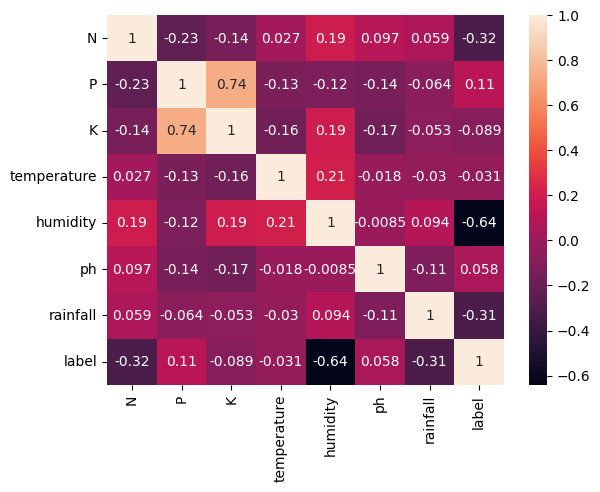

In [ ]:
sns.heatmap(df.corr(), annot=True, cbar=True)

In [ ]:
df.label.value_counts()

label
1     100
2     100
3     100
4     100
5     100
6     100
7     100
8     100
9     100
10    100
11    100
12    100
13    100
14    100
15    100
16    100
17    100
18    100
19    100
20    100
21    100
22    100
Name: count, dtype: int64

In [ ]:
df['label'].unique().size

22

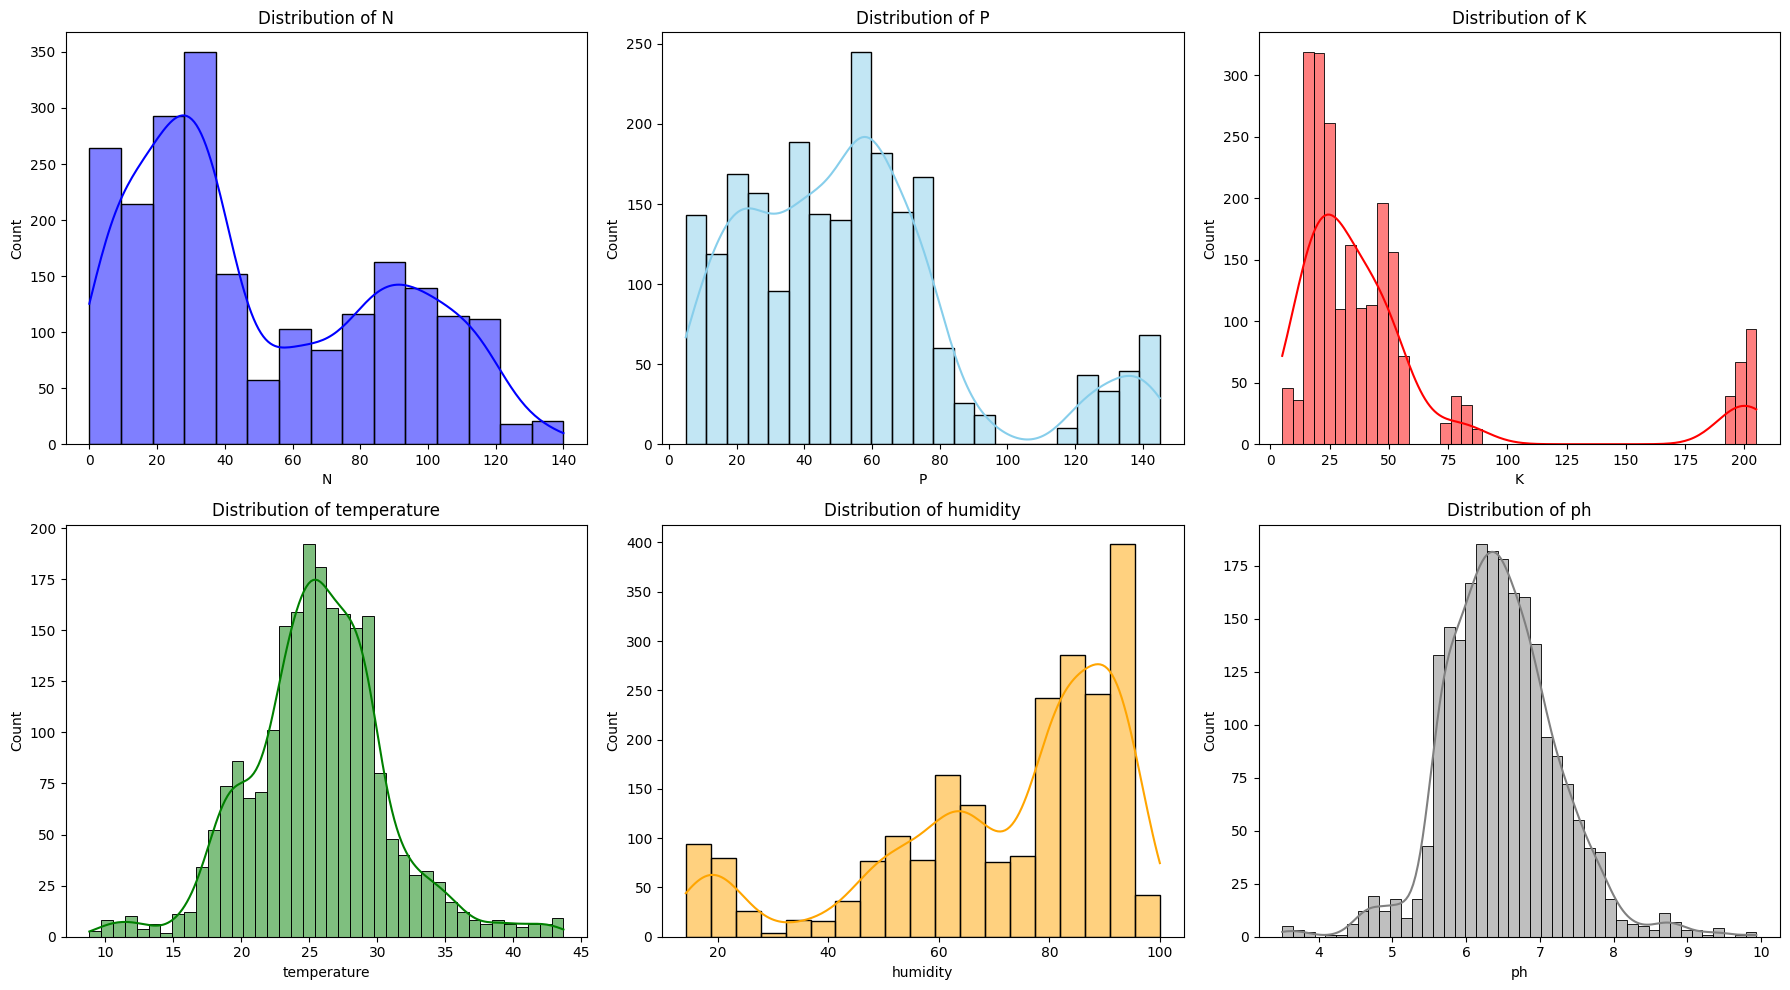

In [ ]:
# Visualization of density
import warnings
warnings.filterwarnings('ignore')

fig, axes = plt.subplots(2, 3, figsize=(18, 10))  # Adjust figsize as needed


sns.histplot(df['N'], kde=True, ax=axes[0, 0], color='blue')
axes[0, 0].set_title("Distribution of N")

sns.histplot(df['P'], kde=True, ax=axes[0, 1], color='skyblue')
axes[0, 1].set_title("Distribution of P")

sns.histplot(df['K'], kde=True, ax=axes[0, 2], color='red')
axes[0, 2].set_title("Distribution of K")

# Plot the second row of distributions
sns.histplot(df['temperature'], kde=True, ax=axes[1, 0], color='green')
axes[1, 0].set_title("Distribution of temperature")

sns.histplot(df['humidity'], kde=True, ax=axes[1, 1], color='orange')
axes[1, 1].set_title("Distribution of humidity")

sns.histplot(df['ph'], kde=True, ax=axes[1, 2], color='gray')
axes[1, 2].set_title("Distribution of ph")

# Adjust layout
plt.tight_layout()
plt.show()

#

# *4.Data Splitting and Preparing*

In [ ]:
X=df.drop('label', axis = 1)
y=df['label']

In [ ]:
X.head()

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340


In [ ]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: label, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [ ]:
mx = MinMaxScaler()
X_train = mx.fit_transform(X_train)
X_test = mx.transform(X_test)
pd.DataFrame(X_train)

,0,1,2,3,4,5,6
0,0.121429,0.078571,0.045,0.217234,0.908990,0.485322,0.296852
1,0.264286,0.528571,0.070,0.537110,0.642579,0.565941,0.176308
2,0.050000,0.485714,0.100,0.536479,0.570058,0.588352,0.089318
3,0.721429,0.464286,0.215,0.474462,0.708898,0.390017,0.345770
4,0.000000,0.085714,0.125,0.764684,0.393181,0.431452,0.278327
...,...,...,...,...,...,...,...
1755,0.071429,0.000000,0.000,0.355451,0.899329,0.670741,0.332938
1756,0.771429,0.635714,0.210,0.531809,0.819906,0.448294,0.253244
1757,0.078571,0.221429,0.130,0.547921,0.437603,0.461981,0.287198
1758,0.078571,0.850000,0.995,0.132116,0.767637,0.444205,0.183467


In [ ]:
# if we have outliers Sc is recomended
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test=sc.transform(X_test)
pd.DataFrame(X_train)

,0,1,2,3,4,5,6
0,-0.903427,-1.126162,-0.668507,-1.804692,0.936586,0.193474,0.005150
1,-0.367051,0.770359,-0.570590,0.386000,-0.100470,0.863918,-0.605291
2,-1.171614,0.589738,-0.453089,0.381678,-0.382775,1.050298,-1.045807
3,1.349349,0.499427,-0.002670,-0.043047,0.157688,-0.599105,0.252872
4,-1.359346,-1.096058,-0.355172,1.944562,-1.071303,-0.254526,-0.088658
...,...,...,...,...,...,...,...
1755,-1.091158,-1.457300,-0.844757,-0.858104,0.898979,1.735467,0.187893
1756,1.537081,1.221911,-0.022254,0.349697,0.589808,-0.114467,-0.215681
1757,-1.064339,-0.524092,-0.335589,0.460044,-0.898381,-0.000634,-0.043736
1758,-1.064339,2.125016,3.052342,-2.387631,0.386340,-0.148467,-0.569037


#

# *5. Model Training*

In [ ]:
models = {
    'LogisticRegression': LogisticRegression(),
    'GaussianNB':GaussianNB(),
    'SVC':SVC(),
    'KNeighborsClassifier':KNeighborsClassifier(),
    'DecisionTreeClassifier':DecisionTreeClassifier(),
    'ExtraTreeClassifier':ExtraTreeClassifier(),
    'RandomForestClassifier':RandomForestClassifier(),
    'BaggingClassifier':BaggingClassifier(),
    'GradientBoostingClassifier':GradientBoostingClassifier(),
    'AdaBoostClassifier':AdaBoostClassifier()
}

In [ ]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    print(f"{name} model with accuracy: {score}")

LogisticRegression model with accuracy: 0.9636363636363636
GaussianNB model with accuracy: 0.9954545454545455
SVC model with accuracy: 0.9681818181818181
KNeighborsClassifier model with accuracy: 0.9590909090909091
DecisionTreeClassifier model with accuracy: 0.9886363636363636
ExtraTreeClassifier model with accuracy: 0.9090909090909091
RandomForestClassifier model with accuracy: 0.9931818181818182
BaggingClassifier model with accuracy: 0.9886363636363636
GradientBoostingClassifier model with accuracy: 0.9818181818181818
AdaBoostClassifier model with accuracy: 0.1409090909090909


In [ ]:
randclf = RandomForestClassifier()
randclf.fit(X_train, y_train)
y_pred = randclf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9931818181818182

#

# *6. Prediction System*

In [ ]:
def recommendation(N,P,K,temperature,humidity,ph,rainfall):
    features = np.array([[N,P,K,temperature,humidity,ph,rainfall]])
    mx_features = mx.fit_transform(features)
    sc_mx_features = sc.fit_transform(mx_features)
    prediction = randclf.predict(sc_mx_features).reshape(1,-1)
    return prediction[0]


In [ ]:
N=90
P= 42
K= 43
temperature= 20.879744
humidity=82.002744
ph=6.502985
rainfall=202.935536

predict = recommendation(N,P,K,temperature,humidity,ph,rainfall)
predict

array([6])